1. Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ

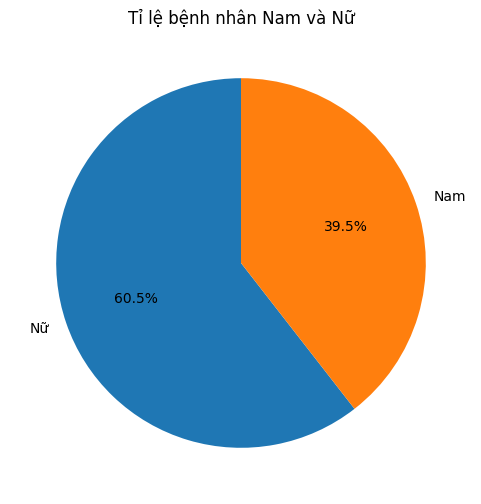

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/patient_heart_rate_clean.csv")

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index.map(lambda x: 'Nam' if x == 'm' else 'Nữ'),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Tỉ lệ bệnh nhân Nam và Nữ")
plt.show()


2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname

In [21]:
df["Fullname"] = df["Firstname"] + " " + df["Lastname"]

3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân

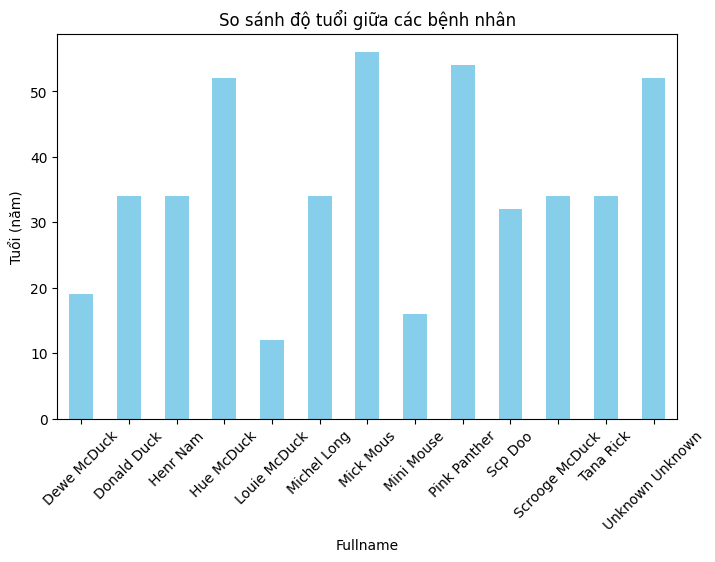

In [22]:
plt.figure(figsize=(8,5))
df_age = df.groupby("Fullname")["Age"].mean()
df_age.plot(kind="bar", color="skyblue")
plt.title("So sánh độ tuổi giữa các bệnh nhân")
plt.ylabel("Tuổi (năm)")
plt.xticks(rotation=45)
plt.show()

4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân 

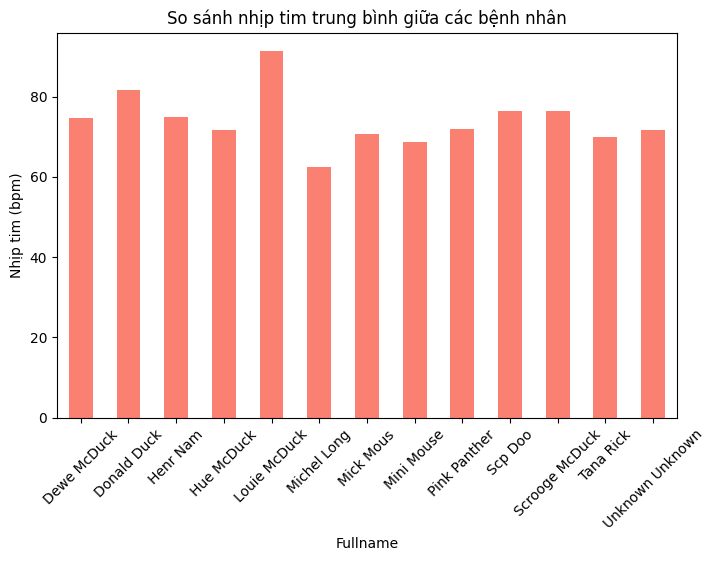

In [23]:
plt.figure(figsize=(8,5))
df_pulse = df.groupby("Fullname")["PulseRate"].mean()
df_pulse.plot(kind="bar", color="salmon")
plt.title("So sánh nhịp tim trung bình giữa các bệnh nhân")
plt.ylabel("Nhịp tim (bpm)")
plt.xticks(rotation=45)
plt.show()

5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có 
phân loại theo giới tính

<Figure size 800x500 with 0 Axes>

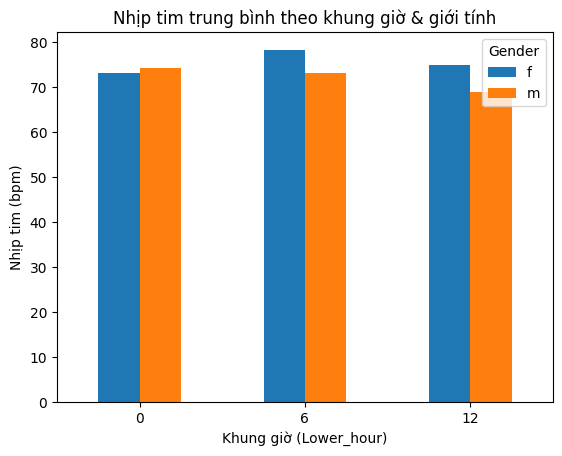

In [24]:
plt.figure(figsize=(8,5))
df_time = df.groupby(["Gender", "Lower_hour"])["PulseRate"].mean().unstack("Gender")
df_time.plot(kind="bar")
plt.title("Nhịp tim trung bình theo khung giờ & giới tính")
plt.ylabel("Nhịp tim (bpm)")
plt.xlabel("Khung giờ (Lower_hour)")
plt.xticks(rotation=0)
plt.show()

6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim

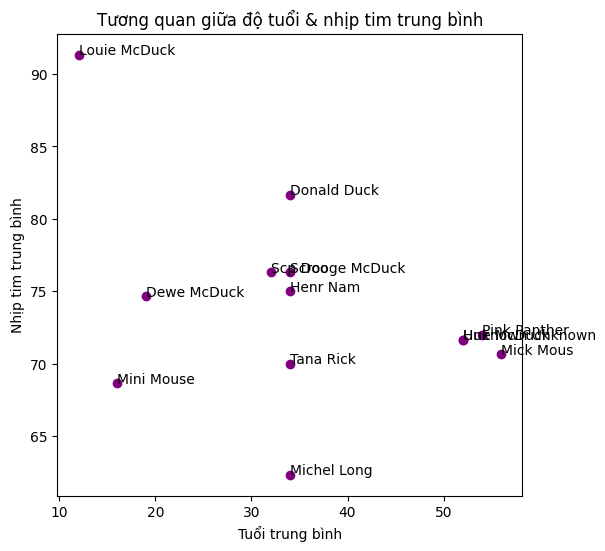

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(df_age, df_pulse, color="purple")
for name in df_age.index:
    plt.text(df_age[name], df_pulse[name], name)   # gắn label tên
plt.title("Tương quan giữa độ tuổi & nhịp tim trung bình")
plt.xlabel("Tuổi trung bình")
plt.ylabel("Nhịp tim trung bình")
plt.show()

7. Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự 
khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính.

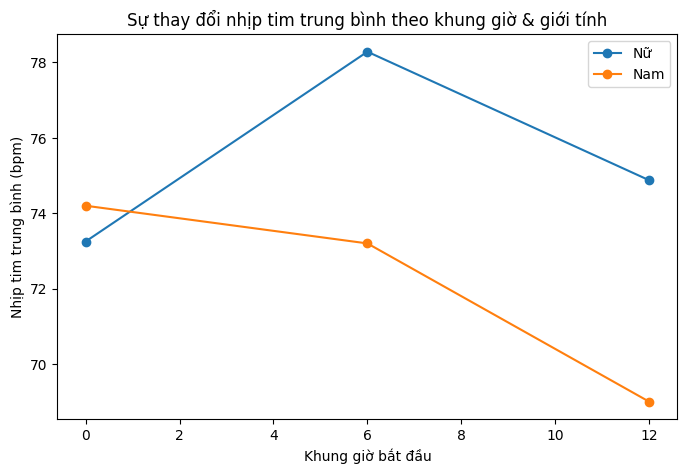

In [26]:
plt.figure(figsize=(8,5))
df_line = df.groupby(["Lower_hour","Gender"])["PulseRate"].mean().reset_index()
for gender in df_line["Gender"].unique():
    subset = df_line[df_line["Gender"] == gender]
    plt.plot(subset["Lower_hour"], subset["PulseRate"], marker="o", label=("Nam" if gender=="m" else "Nữ"))
plt.title("Sự thay đổi nhịp tim trung bình theo khung giờ & giới tính")
plt.xlabel("Khung giờ bắt đầu")
plt.ylabel("Nhịp tim trung bình (bpm)")
plt.legend()
plt.show()